In [ ]:
import pandas as pd
file_path = r"C:\Users\BAPS\jupyter noteboooks\Datasets\clustering\target.csv"

In [2]:
df = pd.read_csv(file_path)

In [3]:
df

,x,y,class
0,-3.000000,-3.000000,5
1,-3.000000,3.000000,4
2,3.000000,-3.000000,6
3,3.000000,3.000000,3
4,-0.417091,0.114782,1
...,...,...,...
765,-1.604434,-1.118861,2
766,-3.050000,-3.050000,5
767,-3.050000,2.950000,4
768,2.950000,-3.050000,6


In [4]:
df.isnull().sum()

x        0
y        0
class    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       770 non-null    float64
 1   y       770 non-null    float64
 2   class   770 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 18.2 KB


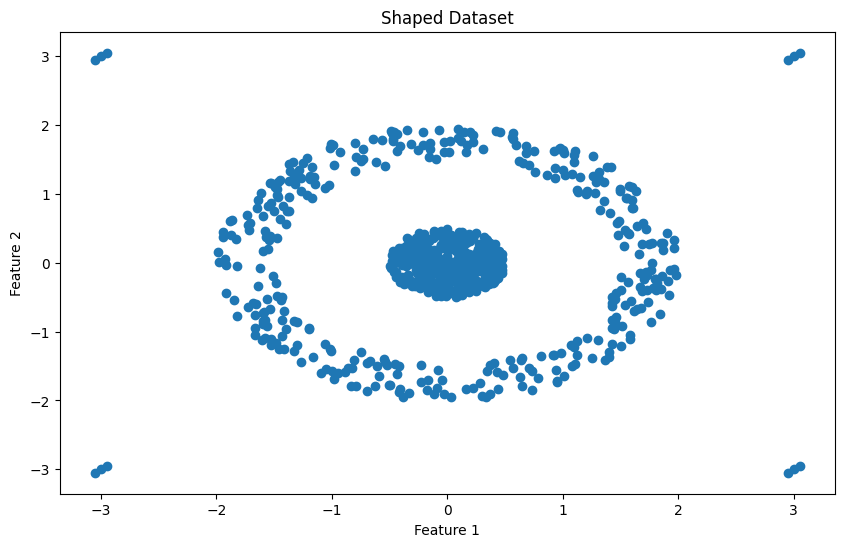

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df.x, df.y)
plt.title('Shaped Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [8]:
data = df[['x', 'y']]

In [9]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

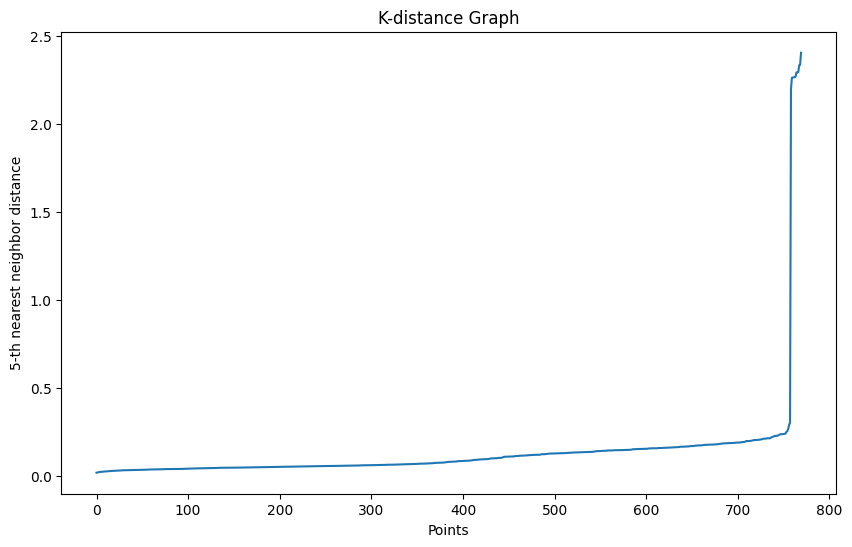

In [11]:
def plot_k_distance_graph(data, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.show()
# Plot k-distance graph
plot_k_distance_graph(data, k=5)

In [99]:
dbscan = DBSCAN(eps=.35, min_samples=5)

clusters = dbscan.fit_predict(data)

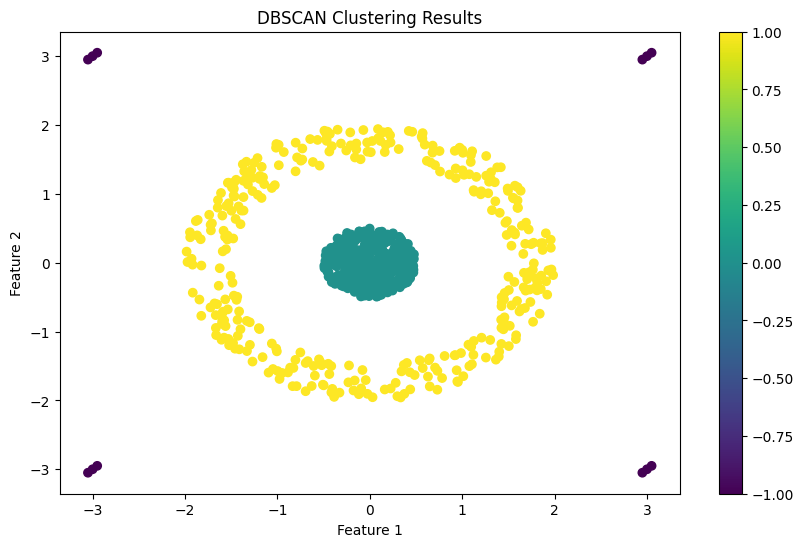

In [100]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data.x, data.y, c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [14]:
file_path = r"C:\Users\BAPS\jupyter noteboooks\Datasets\clustering\biodeg.csv"

df = pd.read_csv(file_path)

In [15]:
df

,3.919,2.6909,0,0.1,0.2,0.3,0.4,31.4,2,0.5,...,0.19,0.20,0.21,2.949,1.591,0.22,7.253,0.23,0.24,1
0,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,1
1,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,1
2,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,1
3,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,1
4,4.236,3.4286,0,0,0,0,0,28.6,2,4,...,0,0,0,3.351,2.556,0,7.904,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,5.431,2.8955,0,0,0,2,0,32.1,4,1,...,0,6,1,3.573,2.242,1,8.088,0,0,2
1050,5.287,3.3732,0,0,9,0,0,35.3,0,9,...,0,3,0,3.787,3.083,3,9.278,0,0,2
1051,4.869,1.7670,0,1,9,0,5,44.4,0,4,...,4,13,0,3.848,2.576,5,9.537,1,0,2
1052,5.158,1.6914,2,0,36,0,9,56.1,0,0,...,1,16,0,5.808,2.055,8,11.055,0,1,2


In [16]:
df.isnull().sum()

3.919     0
2.6909    0
0         0
0.1       0
0.2       0
0.3       0
0.4       0
31.4      0
2         0
0.5       0
0.6       0
0.7       0
3.106     0
2.55      0
9.002     0
0.8       0
0.96      0
1.142     0
0.9       0
0.10      0
0.11      0
1.201     0
0.12      0
0.13      0
0.14      0
0.15      0
1.932     0
0.011     0
0.16      0
0.17      0
4.489     0
0.18      0
0.19      0
0.20      0
0.21      0
2.949     0
1.591     0
0.22      0
7.253     0
0.23      0
0.24      0
1         0
dtype: int64

In [17]:
df.duplicated().sum()

3

In [18]:
df.drop_duplicates(inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)  # assuming df is your dataframe

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
#implementing Kmeans

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_scaled)
df['Cluster'] = labels

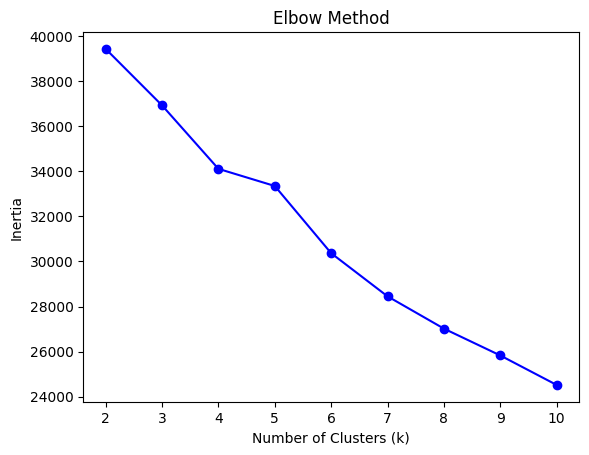

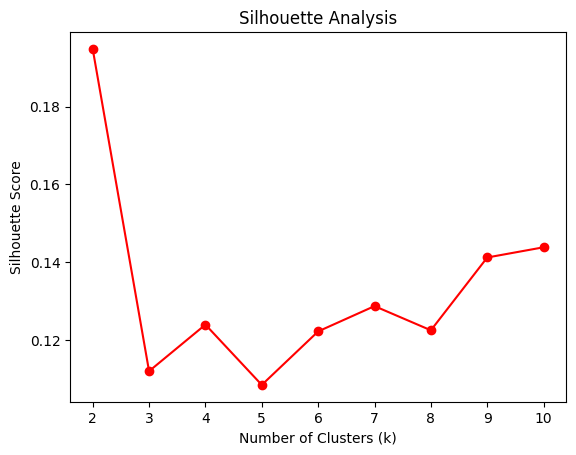

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

inertias = []
sil_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Plot elbow curve
plt.plot(K, inertias, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Plot silhouette scores
plt.plot(K, sil_scores, 'ro-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

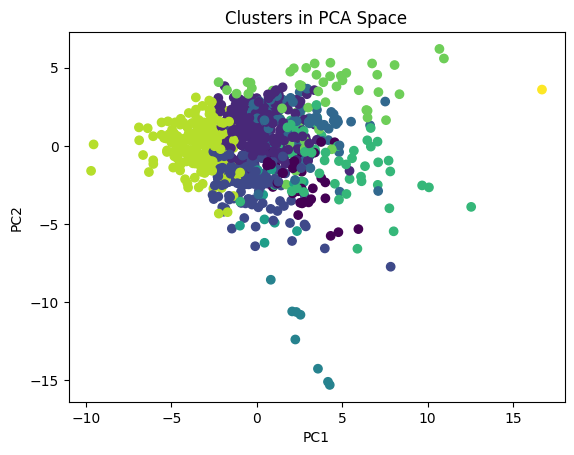

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters in PCA Space")
plt.show()

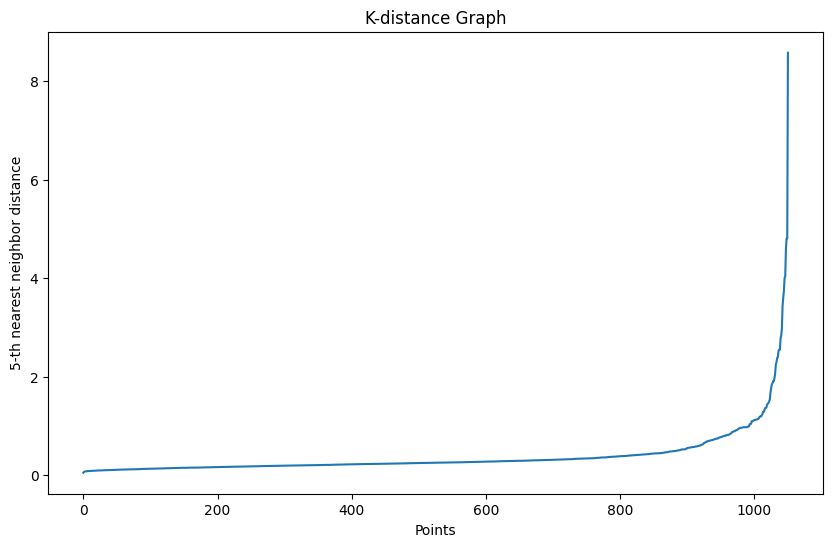

In [30]:
def plot_k_distance_graph(X_pca, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X_pca)
    distances, _ = neigh.kneighbors(X_pca)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.show()
# Plot k-distance graph
plot_k_distance_graph(X_pca, k=5)

In [45]:
dbscan = DBSCAN(eps=1.3, min_samples=5)

clusters = dbscan.fit_predict(X_pca)

In [64]:
clusters

array([ 0,  0,  0, ...,  0, -1,  0], dtype=int64)

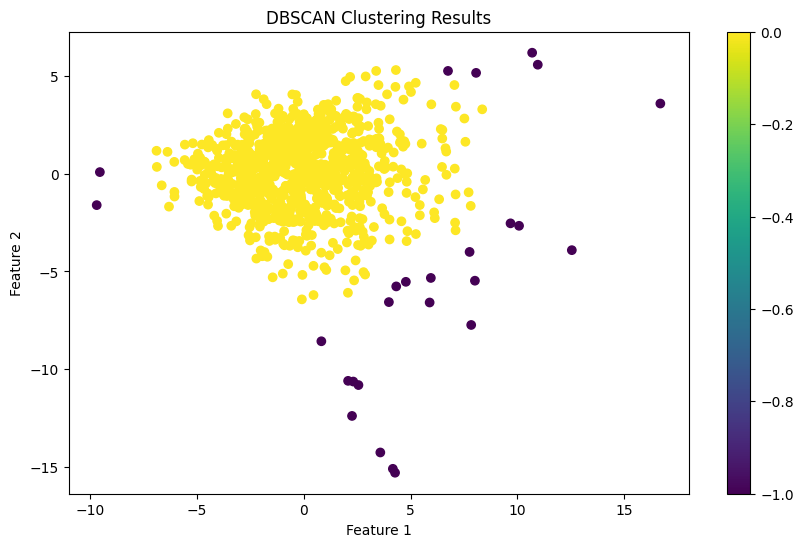

In [46]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [58]:
from sklearn_extra.cluster import KMedoids

In [86]:
kmedoids = KMedoids(n_clusters=3, metric='euclidean', random_state=42)
medoids = kmedoids.fit_predict(X_pca)

In [87]:
medoids

array([2, 2, 2, ..., 0, 0, 1], dtype=int64)

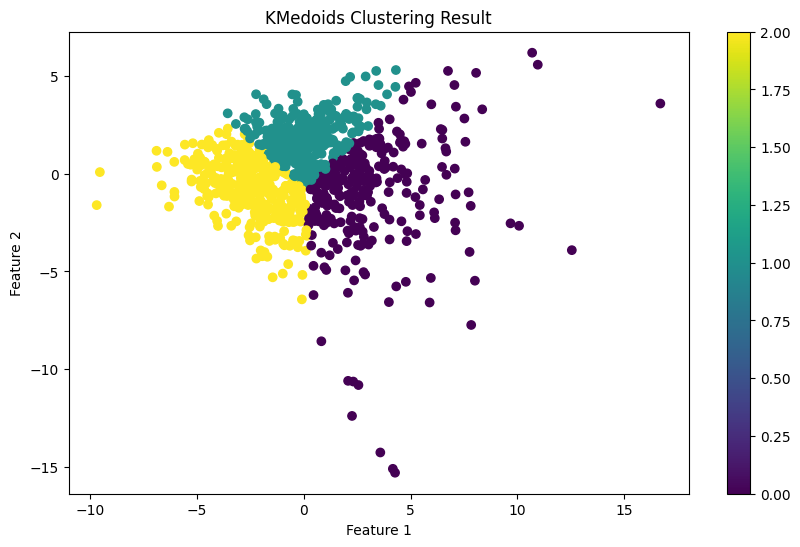

In [88]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=medoids)
plt.colorbar(scatter)
plt.title('KMedoids Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [68]:
X_pca

array([[-3.63679462,  0.79823281],
       [-3.59589758, -1.13368707],
       [-6.31450812, -1.68033249],
       ...,
       [ 6.10019383, -1.97373185],
       [16.69307715,  3.59966507],
       [ 1.97815859,  3.06944159]])

In [102]:
from sklearn.cluster import AgglomerativeClustering
# Initialize the Agglomerative Clustering algorithm
agg_clustering = AgglomerativeClustering(n_clusters=3)

# Fit the model and predict cluster labels
y_agg = agg_clustering.fit_predict(X_pca)

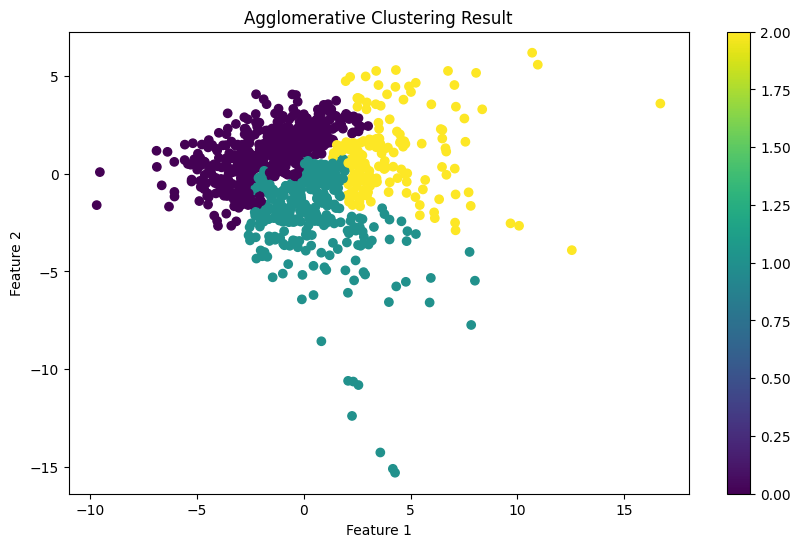

In [85]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y_agg)
plt.colorbar(scatter)
plt.title('Agglomerative Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
from sklearn.cluster import OPTICS

#“Ordering Points To Identify the Clustering Structure”

In [94]:
optics = OPTICS(min_samples=5, xi=0.02)

clusters = optics.fit_predict(X_pca)

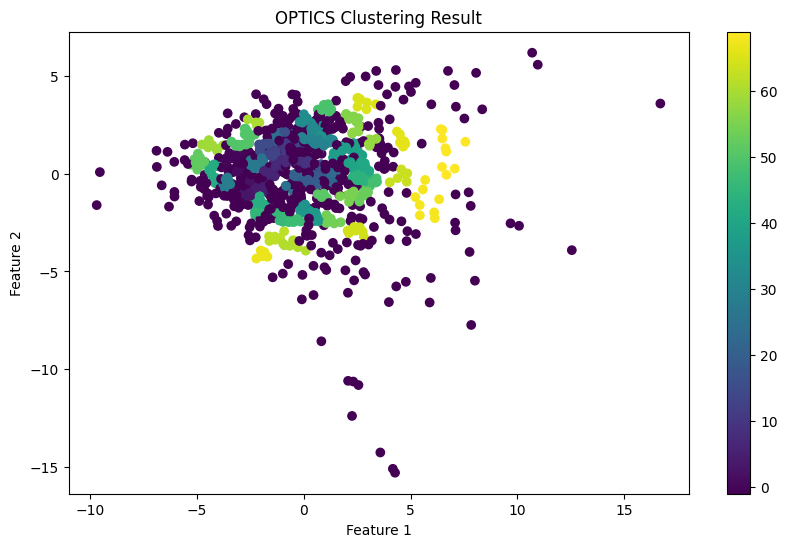

In [95]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters)
plt.colorbar(scatter)
plt.title('OPTICS Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

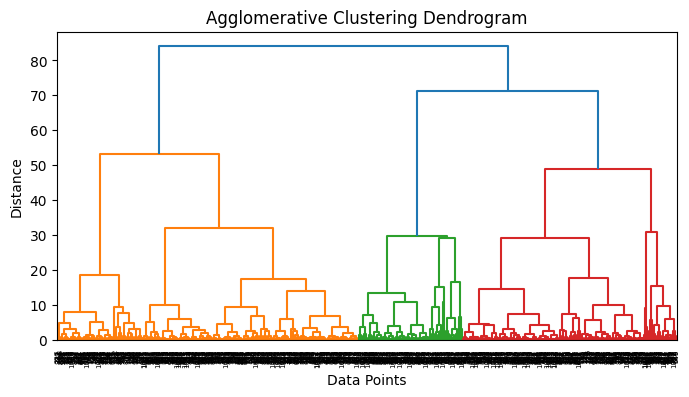

Cluster assignments: [1 1 1 ... 2 2 1]


In [106]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Z = linkage(X_pca, method='ward')


# Plots dendrogram
plt.figure(figsize=(8, 4))
dendrogram(Z)
plt.title('Agglomerative Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Extracts clusters (e.g., form 2 clusters)
clusters = fcluster(Z, t=2, criterion='maxclust')
print("Cluster assignments:", clusters)

In [107]:
from sklearn.mixture import GaussianMixture

# Initialize and fit GMM
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)  
labels = gmm.fit_predict(X_pca)  # cluster assignments
probs = gmm.predict_proba(X_pca) # soft probabilities


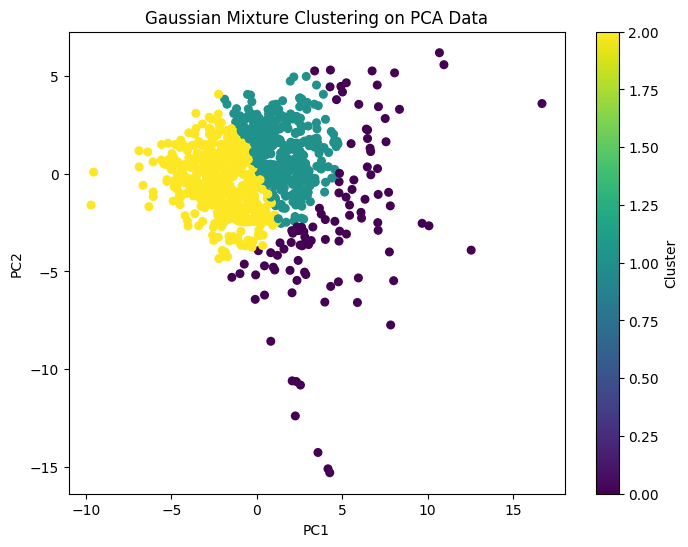

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=30)
plt.colorbar(scatter, label="Cluster")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Gaussian Mixture Clustering on PCA Data")
plt.show()
